# Description:
This script focusses on manually fixing the zero averaging problems encountered in the transit curves, investigating the presence of this structure in September and looking into potential pedestal value problems at these points in time.

# Import modules:

In [1]:
from GalaxyFunctions import *
from datetime import datetime

# Zero Averaged transit curves:

In [4]:
RunList=np.concatenate((np.arange(8,24),np.arange(306,310),np.arange(289,298),np.arange(284,288),np.arange(162,186)))
for BadRun in [16,17]: 
    RunList=np.delete(RunList,np.where(RunList==BadRun)[0][0])

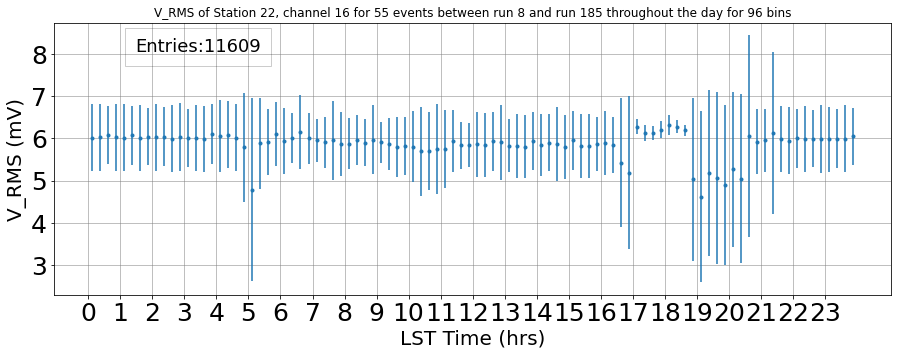

In [7]:
EventTime, EventRMS, MidBins, GroupedVRMS, FilteredRuns,FilteredEvNrs=TransitCurve(22,16,RunList,NBins=4*24,ZeroAvg=True,TimeFormat="LST",Triggers=(5,5,5,5),StdCut=(-1,-1), FFTFilter=False,Lowpass=False,HardCut=-1,EventSkip=25,Plot=True)

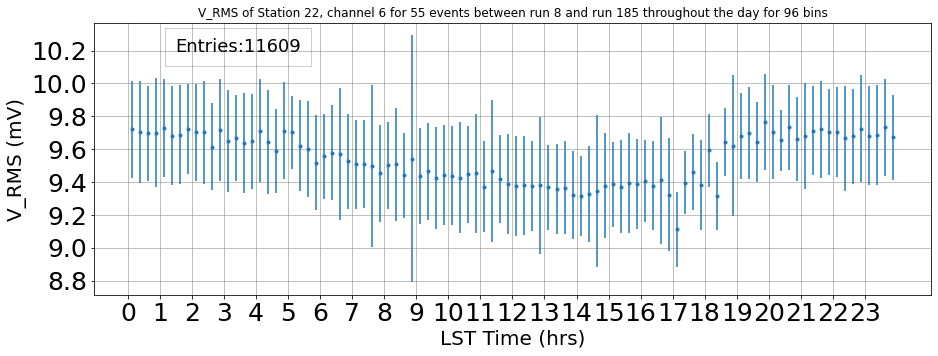

In [4]:
EventTime, EventRMS, MidBins, GroupedVRMS, FilteredRuns,FilteredEvNrs=TransitCurve(22,6,RunList,NBins=4*24,ZeroAvg=True,TimeFormat="LST",Triggers=(5,5,5,5),StdCut=(-1,-1), FFTFilter=False,Lowpass=False,HardCut=-1,EventSkip=25,Plot=True)

With this we have succesfully mediated the peak structure present in the transit curve. <br>
Looking at the zero averaged transit curve for the other stations/channels:

Compute which times the runs from the runlist are from so that we can have a rough assumption what runs to take for the other stations

In [20]:
HeaderFile=GetHeaderFile(22,RunList[0])
TriggerTimes=HeaderFile["trigger_time"].array(library='np')
MinRunTimeStamp=TriggerTimes[0]
MaxRunTimeStamp=TriggerTimes[-1]
for RunNr in RunList:
    # WaveFormFile=GetWaveformsFile(StNr,RunNr)
    HeaderFile=GetHeaderFile(22,RunNr)
    # RadiantData=WaveFormFile['radiant_data[24][2048]'].array(library='np')
    # EventNrs=WaveFormFile['event_number'].array(library="np")
    TriggerTimes=HeaderFile["trigger_time"].array(library='np')
    # print(TriggerTimes.shape)
    MinRunTimeStamp=np.min([MinRunTimeStamp,TriggerTimes[0],TriggerTimes[-1]])
    MaxRunTimeStamp=np.max([MaxRunTimeStamp,TriggerTimes[0],TriggerTimes[-1]])
print("from",MinRunTimeStamp,'to',MaxRunTimeStamp, "in Unix time")
print("Which corresponds to")
print("from",datetime.utcfromtimestamp(MinRunTimeStamp),'to',datetime.utcfromtimestamp(MaxRunTimeStamp))

from 1626524060.251537 to 1628757273.2679255 in Unix time
Which corresponds to
from 2021-07-17 12:14:20.251537 to 2021-08-12 08:34:33.267926


St22: from 2021-07-17 12:14:20.251537 to 2021-08-12 08:34:33.267926 corresponds to: <br>
St11: from run 9 to run 268 <br>
St21: from run 31 to run 435

In [ ]:
RunListUnixTimes=np.array([(GetHeaderFile(22,Run)["trigger_time"].array(library='np')[0],GetHeaderFile(22,Run)["trigger_time"].array(library='np')[-1]) for Run in RunList])

In [14]:
RunListSt11=np.array([],dtype=int)
for St11Run in np.arange(9,269):
    # if St11Run in [49,50]:
    #     continue
    HeaderFileSt11=GetHeaderFile(11,St11Run)
    if HeaderFileSt11==None:
        continue
    TriggerTimesSt11=HeaderFileSt11["trigger_time"].array(library='np')
    if len(TriggerTimesSt11)==0:
        continue
    for St22RunIdx in np.arange(len(RunList)):
        if RunListUnixTimes[St22RunIdx][0]<TriggerTimesSt11[0]<RunListUnixTimes[St22RunIdx][1] or RunListUnixTimes[St22RunIdx][0]<TriggerTimesSt11[-1]<RunListUnixTimes[St22RunIdx][1]:
            RunListSt11=np.append(RunListSt11,St11Run)
            break
print(RunListSt11)

NonStandard Key in run 49 , options are:
[]
NonStandard Key in run 50 , options are:
[]
NonStandard Key in run 51 , options are:
[]
NonStandard Key in run 52 , options are:
[]
NonStandard Key in run 53 , options are:
[]
NonStandard Key in run 54 , options are:
[]
NonStandard Key in run 55 , options are:
[]
NonStandard Key in run 56 , options are:
[]
NonStandard Key in run 57 , options are:
[]
NonStandard Key in run 58 , options are:
[]
[135 136 137 138 139 140 141 142 143 144 145 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 267 268]


In [15]:
RunListSt21=np.array([],dtype=int)
# RunListUnixTimes=np.array([(GetHeaderFile(22,Run)["trigger_time"].array(library='np')[0],GetHeaderFile(22,Run)["trigger_time"].array(library='np')[-1]) for Run in RunList])
for St21Run in np.arange(31,435):
    # if St11Run in [49,50]:
    #     continue
    HeaderFileSt21=GetHeaderFile(21,St21Run)
    if HeaderFileSt21==None:
        continue
    TriggerTimesSt21=HeaderFileSt21["trigger_time"].array(library='np')
    if len(TriggerTimesSt21)==0:
        continue
    for St22RunIdx in np.arange(len(RunList)):
        if RunListUnixTimes[St22RunIdx][0]<TriggerTimesSt21[0]<RunListUnixTimes[St22RunIdx][1] or RunListUnixTimes[St22RunIdx][0]<TriggerTimesSt21[-1]<RunListUnixTimes[St22RunIdx][1]:
            RunListSt21=np.append(RunListSt21,St21Run)
            break
print(RunListSt21)

NonStandard Key in run 35 , options are:
[]
NonStandard Key in run 43 , options are:
[]
NonStandard Key in run 45 , options are:
[]
NonStandard Key in run 59 , options are:
[]
NonStandard Key in run 60 , options are:
[]
NonStandard Key in run 150 , options are:
[]
NonStandard Key in run 151 , options are:
[]
[ 47  48  54  55  56  57  58  62  63  64  65  66  67 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 397 398 399 400 401 402 403 404 405 407 409 410 411 412 413 414 415
 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431]


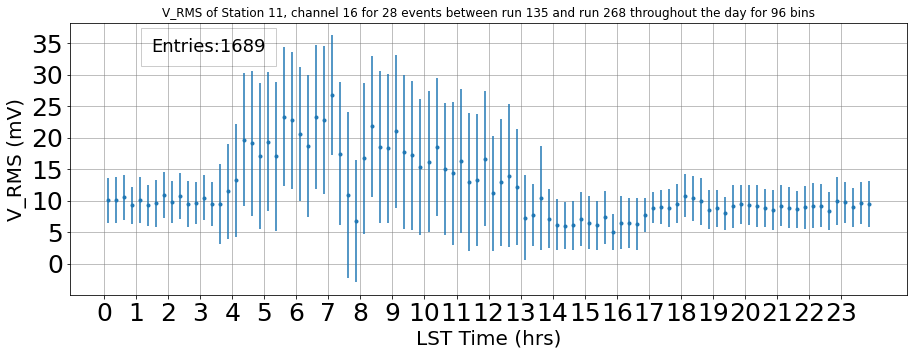

In [16]:
EventTime, EventRMS, MidBins, GroupedVRMS, FilteredRuns,FilteredEvNrs=TransitCurve(11,16,RunListSt11,NBins=4*24,ZeroAvg=True,TimeFormat="LST",Triggers=(5,5,5,5),StdCut=(-1,-1), FFTFilter=False,Lowpass=False,HardCut=-1,EventSkip=25,Plot=True)

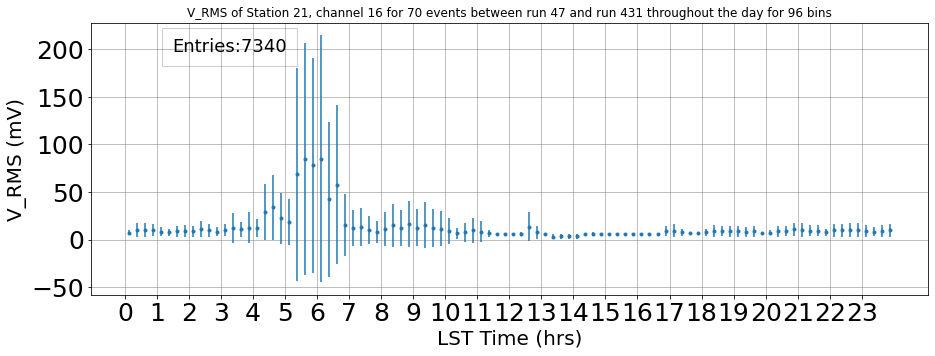

In [17]:
EventTime, EventRMS, MidBins, GroupedVRMS, FilteredRuns,FilteredEvNrs=TransitCurve(21,16,RunListSt21,NBins=4*24,ZeroAvg=True,TimeFormat="LST",Triggers=(5,5,5,5),StdCut=(-1,-1), FFTFilter=False,Lowpass=False,HardCut=-1,EventSkip=25,Plot=True)

# Is transit curve structure still visible in september?:

Define relevant run numbers

In [2]:
SepRunList=np.arange(547,573,dtype=int)
print(SepRunList)

[547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563 564
 565 566 567 568 569 570 571 572]


In [4]:
AugRunList=np.concatenate((np.arange(306,463,dtype=int),np.arange(464,546,dtype=int)))
print(AugRunList)

[306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 464 465 466 467 468
 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486
 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504
 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522
 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540
 541 542 543 544 545]


**Transit curve in eind Augustus:**

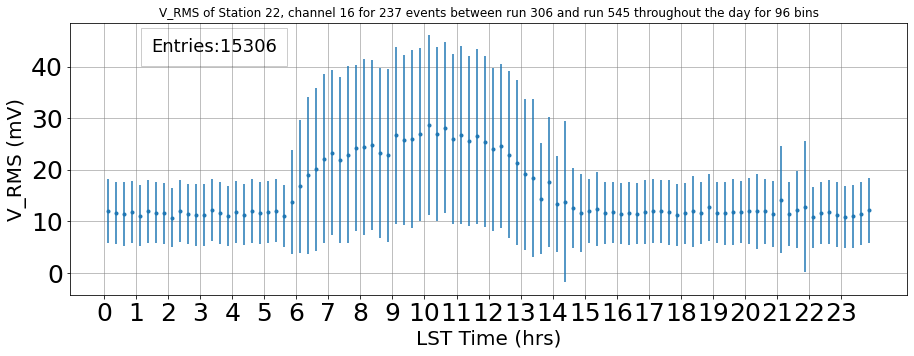

In [5]:
EventTime, EventRMS, MidBins, GroupedVRMS, FilteredRuns,FilteredEvNrs=TransitCurve(22,16,AugRunList,NBins=4*24,ZeroAvg=True,TimeFormat="LST",Triggers=(5,5,5,5),StdCut=(-1,-1), FFTFilter=False,Lowpass=False,HardCut=-1,EventSkip=25,Plot=True)

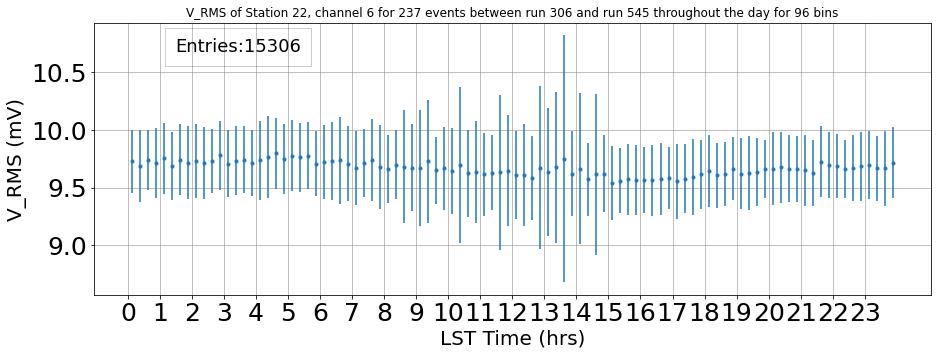

In [6]:
EventTime, EventRMS, MidBins, GroupedVRMS, FilteredRuns,FilteredEvNrs=TransitCurve(22,6,AugRunList,NBins=4*24,ZeroAvg=True,TimeFormat="LST",Triggers=(5,5,5,5),StdCut=(-1,-1), FFTFilter=False,Lowpass=False,HardCut=-1,EventSkip=25,Plot=True)

**Transit curve in September:**

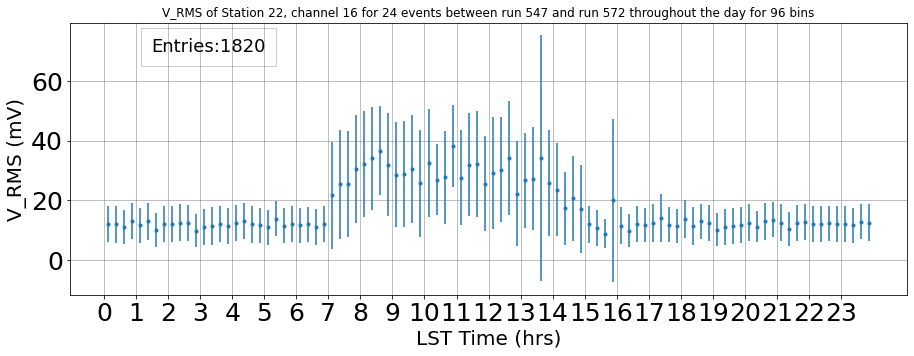

In [5]:
EventTime, EventRMS, MidBins, GroupedVRMS, FilteredRuns,FilteredEvNrs=TransitCurve(22,16,SepRunList,NBins=4*24,ZeroAvg=True,TimeFormat="LST",Triggers=(5,5,5,5),StdCut=(-1,-1), FFTFilter=False,Lowpass=False,HardCut=-1,EventSkip=25,Plot=True)

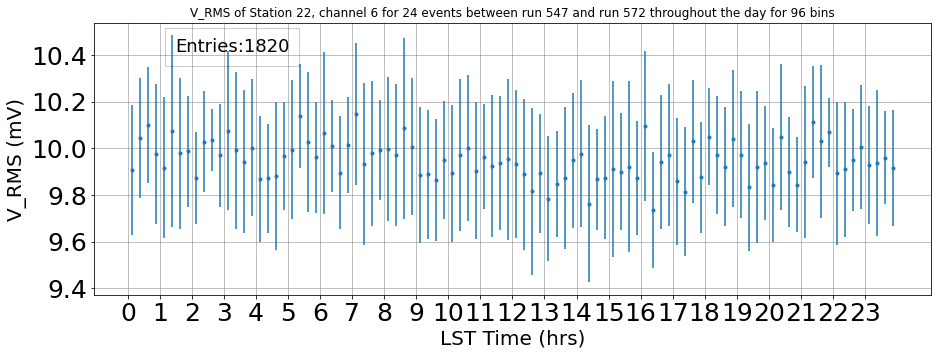

In [6]:
EventTime, EventRMS, MidBins, GroupedVRMS, FilteredRuns,FilteredEvNrs=TransitCurve(22,6,SepRunList,NBins=4*24,ZeroAvg=True,TimeFormat="LST",Triggers=(5,5,5,5),StdCut=(-1,-1), FFTFilter=False,Lowpass=False,HardCut=-1,EventSkip=25,Plot=True)

In the deeper channels we still see such a structure, however this structure is absent for the upwards facing LPDAs. <br>

When looking at the LPDAs, we see that from 7hr to 15hr there is a big bump, similar as during the other months of the summer. The curve of Ch6 in August shows something more stable.